In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from math import sqrt as sqrt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
import itertools
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./datasets/ceda/pre/pre5.csv',index_col='DATE',parse_dates=['DATE'])

In [3]:
data['z'] = (data['TOTAL PRECIPITATION'] - data['TOTAL PRECIPITATION'].mean())/data["TOTAL PRECIPITATION"].std(ddof=0)

In [4]:
zscores = np.where((data['z']>3) | (data['z']<-3))
print(zscores)

(array([  30,   91,  102,  199,  343,  366,  391,  570,  667,  679,  702,
        871,  895,  907,  930,  954, 1027, 1050, 1062, 1110, 1134, 1147,
       1159, 1267, 1314, 1315, 1351, 1370], dtype=int64),)


In [5]:
list=[30,   91,  102,  199,  343,  366,  391,  570,  667,  679,  702,
        871,  895,  907,  930,  954, 1027, 1050, 1062, 1110, 1134, 1147,
       1159, 1267, 1314, 1315, 1351, 1370]
for index in list:
    data['TOTAL PRECIPITATION'].iloc[index] = (data['TOTAL PRECIPITATION'].iloc[index-1] + data['TOTAL PRECIPITATION'].iloc[index+1])/2

In [6]:
data['z'] = (data['TOTAL PRECIPITATION'] - data['TOTAL PRECIPITATION'].mean())/data["TOTAL PRECIPITATION"].std(ddof=0)
zscores = np.where((data['z']>3) | (data['z']<-3))
print(zscores)

(array([ 270,  271,  332,  762,  894,  966, 1194, 1225, 1266, 1314, 1374],
      dtype=int64),)


In [7]:
list=[270,  271,  332,  762,  894,  966, 1194, 1225, 1266, 1314, 1374]
for index in list:
    data['TOTAL PRECIPITATION'].iloc[index] = (data['TOTAL PRECIPITATION'].iloc[index-1] + data['TOTAL PRECIPITATION'].iloc[index+1])/2

In [8]:
data['z'] = (data['TOTAL PRECIPITATION'] - data['TOTAL PRECIPITATION'].mean())/data["TOTAL PRECIPITATION"].std(ddof=0)
zscores = np.where((data['z']>3) | (data['z']<-3))
print(zscores)

(array([  6, 247, 438, 644], dtype=int64),)


In [9]:
list=[6, 247, 438, 644]
for index in list:
    data['TOTAL PRECIPITATION'].iloc[index] = (data['TOTAL PRECIPITATION'].iloc[index-1] + data['TOTAL PRECIPITATION'].iloc[index+1])/2

In [10]:
data['z'] = (data['TOTAL PRECIPITATION'] - data['TOTAL PRECIPITATION'].mean())/data["TOTAL PRECIPITATION"].std(ddof=0)
zscores = np.where((data['z']>3) | (data['z']<-3))
print(zscores)

(array([655], dtype=int64),)


In [11]:
list=[655]
for index in list:
    data['TOTAL PRECIPITATION'].iloc[index] = (data['TOTAL PRECIPITATION'].iloc[index-1] + data['TOTAL PRECIPITATION'].iloc[index+1])/2

In [12]:
data['z'] = (data['TOTAL PRECIPITATION'] - data['TOTAL PRECIPITATION'].mean())/data["TOTAL PRECIPITATION"].std(ddof=0)
zscores = np.where((data['z']>3) | (data['z']<-3))
print(zscores)

(array([], dtype=int64),)


In [13]:
#Data Split
data.index.freq="M"
point=240
train=data.iloc[:-point]
test=data.iloc[-point:]

In [14]:
def rmse(result):
    t = test['TOTAL PRECIPITATION']
    y = result.forecast(point)
    return np.sqrt(np.mean((t-y)**2))

In [15]:
def pff(result, d, col):
  fig, ax = plt.subplots(figsize=(18, 6))
  ax.plot(data[col], label='Observed')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='Fitted')

  # forecast the test set
  prediction_result = result.get_forecast(point)
  #conf_int = prediction_result.conf_int()
  #lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='Forecast')
  #ax.fill_between(test.index, \
                  #lower, upper, \
                  #color='red', alpha=0.3)
  ax.legend(loc='upper left')

In [16]:
def pff_new(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(test[col], label='Observed')
    # forecast the test set
    prediction_result = result.get_forecast(point)
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Precipitation')
    #ax.set_xticks('DATE')

In [16]:
p = range(1,13)
d = range(1,3)
q = range(0,13)
pdq = list(itertools.product(p, d, q))
print('ARIMA,','AIC,','RMSE')
'''seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['TOTAL PRECIPITATION'],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('{}x{},{},{}'.format(param,param_seasonal, results.aic,(rmse(results))))'''
for param in pdq:
    model = ARIMA(train['TOTAL PRECIPITATION'],
                  order=param,
                  enforce_stationarity=False,
                  enforce_invertibility=False)
    results = model.fit()
    print('{},{},{}'.format(param,results.aic,(rmse(results))))

ARIMA, AIC, RMSE
(1, 1, 0),1784.9192543145775,1594.2482762909533
(1, 1, 1),1739.0137604696936,1823.360615614355
(1, 1, 2),1719.1406357474416,1867.4435209338392
(1, 1, 3),1704.0320394019336,1857.0054532292402
(1, 1, 4),1688.0121605111638,1814.5287433751823
(1, 1, 5),1669.2213471308216,1853.005582502369
(1, 1, 6),1643.9933211470084,1939.056832500143
(1, 1, 7),1624.266226774567,1928.7933970789584
(1, 1, 8),1608.4460855293125,1922.0139179202358
(1, 1, 9),1592.1080557000191,2041.9078170863988
(1, 1, 10),1578.2081556508192,2030.0025187414556
(1, 1, 11),1562.7980626662172,2148.3413160187793
(1, 1, 12),1533.997977000476,2300.576387289076
(1, 2, 0),1850.2913177316286,15819.9304396705
(1, 2, 1),1776.0084301069414,3129.218142792173
(1, 2, 2),1703.2766468842613,2671.66328321512
(1, 2, 3),1708.419909786146,2524.0937495954417
(1, 2, 4),1684.6184738080017,2565.253108631512
(1, 2, 5),1664.1367659794298,2475.380698547894
(1, 2, 6),1657.661981315253,2478.079711417926
(1, 2, 7),1636.3004909769004,2344.67

(7, 2, 3),1650.3319339373481,2235.728205590213
(7, 2, 4),1646.1635008893365,2392.244711024723
(7, 2, 5),1638.330283972914,2182.6647227825147
(7, 2, 6),1652.244911262407,2485.911528909924
(7, 2, 7),1626.8964134667929,2333.2766857996203
(7, 2, 8),1606.294216989365,2279.879408911411
(7, 2, 9),1584.5645625039897,2423.4161851395347
(7, 2, 10),1562.6241441829684,2292.1995041002324
(7, 2, 11),1539.9513428090684,2608.2541719001874
(7, 2, 12),1529.035574250221,2825.645209734969
(8, 1, 0),1625.7603753297583,1989.1152783923312
(8, 1, 1),1625.3142183488685,1913.548244776408
(8, 1, 2),1625.2607130632557,1950.4301174109726
(8, 1, 3),1627.2157055923049,1962.978750866423
(8, 1, 4),1623.6307924293578,2040.7912916782502
(8, 1, 5),1729.8440676705538,2086.903987673056
(8, 1, 6),1717.9607218386657,1781.5339822196797
(8, 1, 7),1623.5361349900572,1929.6062712814673
(8, 1, 8),1597.8723893129318,2048.9952017560427
(8, 1, 9),1584.3619683694462,2114.6490460109
(8, 1, 10),1567.9729301473863,2119.944526124004
(8, 

In [17]:
model = ARIMA(train['TOTAL PRECIPITATION'],order=(11,1,12),enforce_stationarity=False,enforce_invertibility=False)
premodelA=model.fit()

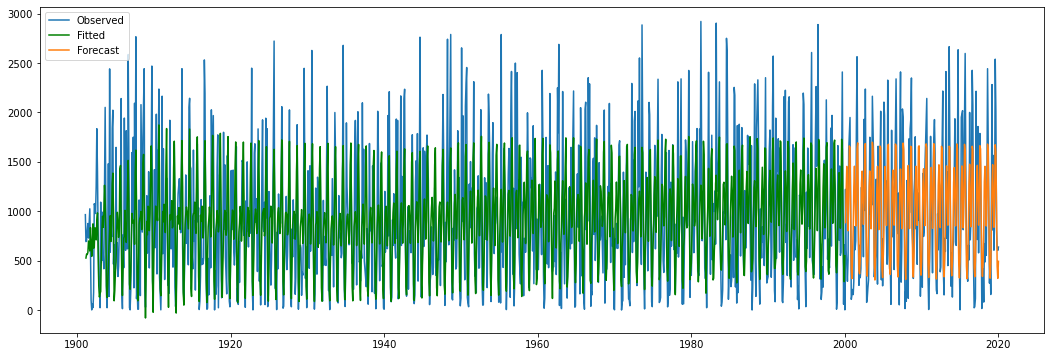

In [18]:
pff(premodelA,1,'TOTAL PRECIPITATION')

In [19]:
rmse(premodelA)

504.9229681145614

In [20]:
r2_score(test['TOTAL PRECIPITATION'],premodelA.forecast(point))

0.4571499161625052

In [21]:
print(premodelA.aic)
print(premodelA.bic)

18005.49111904978
18127.127247059092


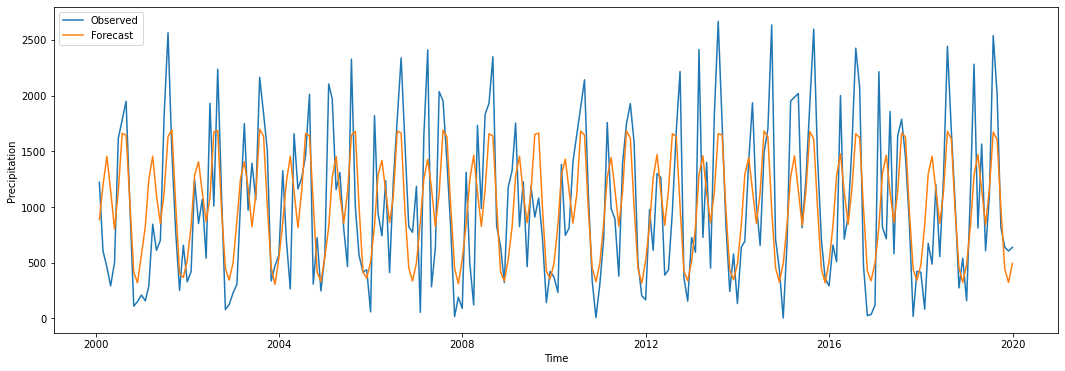

In [58]:
pff_new(premodelA,1,'TOTAL PRECIPITATION')

In [75]:
future=pd.read_csv('./future_pre.csv',index_col='DATE',parse_dates=True)

In [69]:
def pff_future(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    #ax.plot(test[col], label='Observed')
    prediction_result = result.get_forecast(len(future))
    forecast = prediction_result.predicted_mean
    future[col]=forecast
    ax.plot(future.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Precipitation')
    #ax.set_xticks('DATE')

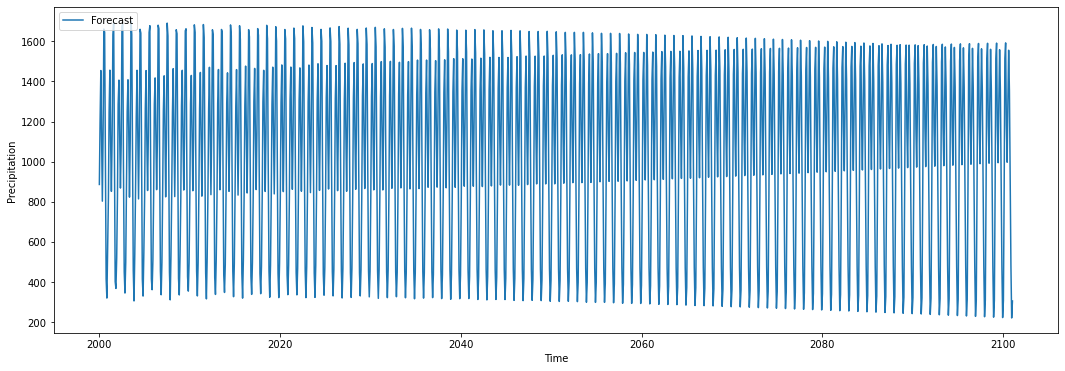

In [71]:
pff_future(premodelA,1,'TOTAL PRECIPITATION')

In [72]:
future.to_csv('./future.csv')

In [77]:
future.head()

,TOTAL PRECIPITATION
DATE,
2000-01-31,886.401073
2000-02-29,1196.051279
2000-03-31,1454.616483
2000-04-30,1145.985431
2000-05-31,803.058792


In [82]:
future.reset_index(inplace=True)
future['MONTH'] = future['DATE'].dt.month
future['DATE'] = future['DATE'].dt.year
future.rename(columns={'DATE':'YEAR'},inplace=True)
future.set_index('YEAR',inplace=True)
future.head()

,TOTAL PRECIPITATION,MONTH
YEAR,,
2000,886.401073,1
2000,1196.051279,2
2000,1454.616483,3
2000,1145.985431,4
2000,803.058792,5


In [85]:
future_temp=pd.DataFrame()
future_temp['JAN']=future['TOTAL PRECIPITATION'].loc[future["MONTH"]==1]

In [86]:
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
i=0
for key in months:
    i+=1
    future_temp[key]=future['TOTAL PRECIPITATION'].loc[future["MONTH"]==i]

In [87]:
future_temp.to_csv('./future_pre_new.csv')